<a href="https://colab.research.google.com/github/dinhtthuha/AIO2025/blob/sumab/Work_with_image_data_Ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gdown

In [ ]:
!gdown 1Lyrc_wzoKBetbToc2-FUlEot43vV-Aw0

Downloading...
From: https://drive.google.com/uc?id=1Lyrc_wzoKBetbToc2-FUlEot43vV-Aw0
To: /content/dataset.zip
100% 12.9M/12.9M [00:00<00:00, 151MB/s]


In [ ]:
!unzip dataset.zip

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Câu 1 : Load ảnh

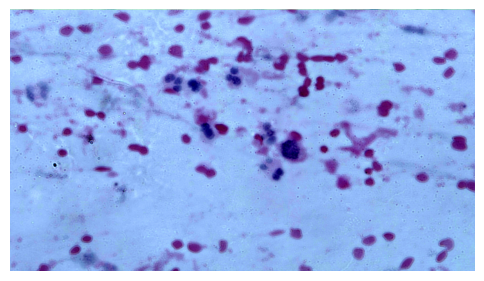

In [ ]:
img_path = '2.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(img)


### Data Augumentation

### Rotate image

In [ ]:
def rotate_image(img, angle):
  height, width = img.shape[:2]
  # get the image centers
  image_center = (width/2, height/2)

  rotation_arr = cv2.getRotationMatrix2D(image_center, angle, scale=1)

  abs_cos = abs(rotation_arr[0,0])
  abs_sin = abs(rotation_arr[0,1])


  bound_w = int(height * abs_sin + width * abs_cos)
  bound_h = int(height * abs_cos + width * abs_sin)

  rotation_arr[0, 2] += bound_w/2 - image_center[0]
  rotation_arr[1, 2] += bound_h/2 - image_center[1]

  rotated_img = cv2.warpAffine(img, rotation_arr, (bound_w, bound_h))
  return rotated_img


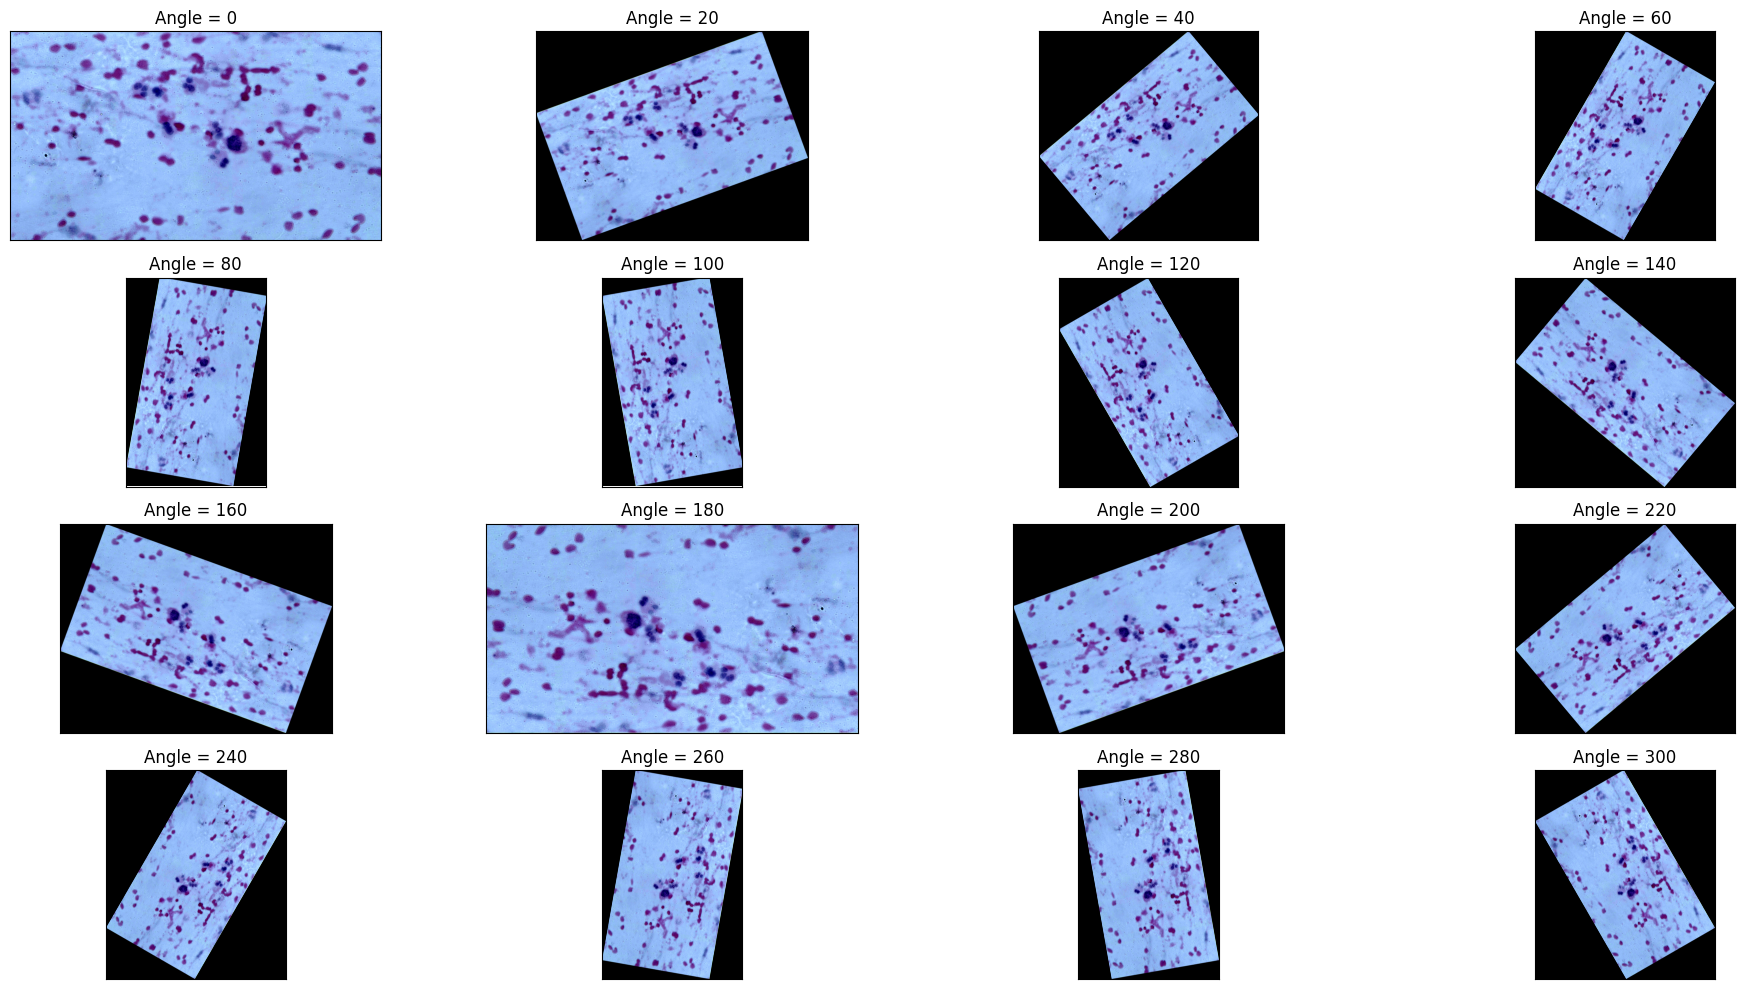

In [ ]:
lst_angle = [angle*20 for angle in range(19)]
lst_angle
height, width = img.shape[:2]
index = 0

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    angle = lst_angle[i]
    rotated_img = rotate_image(img, angle)
    ax.imshow(rotated_img)
    ax.set_title(f'Angle = {angle}')

plt.tight_layout()
plt.show()
